In [22]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [23]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:

base_path = '/content/drive/MyDrive/Final Assignment/Problem Set 1/Dataset/Archive'

In [25]:

train_dir = base_path + '/train'
test_dir = base_path + '/test'
validate_dir = base_path + '/val'

In [26]:
# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validate_datagen = ImageDataGenerator(rescale=1./255)


In [27]:
batch_size = 32
img_height, img_width = 150, 150

In [28]:

# Generators for training, testing, and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.


In [29]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary'
)


Found 624 images belonging to 2 classes.


In [30]:
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 16 images belonging to 2 classes.


In [31]:
# Building the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [34]:

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validate_generator
)


Epoch 1/10
163/163 [==============================] - 660s 4s/step - loss: 0.1034 - accuracy: 0.9640 - val_loss: 0.2774 - val_accuracy: 0.8750
Epoch 2/10
163/163 [==============================] - 67s 410ms/step - loss: 0.0792 - accuracy: 0.9705 - val_loss: 0.1435 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 67s 409ms/step - loss: 0.0568 - accuracy: 0.9789 - val_loss: 0.0818 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 67s 408ms/step - loss: 0.0561 - accuracy: 0.9785 - val_loss: 0.7463 - val_accuracy: 0.7500
Epoch 5/10
163/163 [==============================] - 68s 414ms/step - loss: 0.0357 - accuracy: 0.9881 - val_loss: 0.5591 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 67s 409ms/step - loss: 0.0264 - accuracy: 0.9896 - val_loss: 0.3442 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 67s 410ms/step - loss: 0.0207 - accuracy: 0.9918 - val_loss: 0.3738 - val_accu

In [35]:
test_loss, test_acc = model.evaluate(test_generator)


20/20 [==============================] - 360s 19s/step - loss: 3.8167 - accuracy: 0.7244


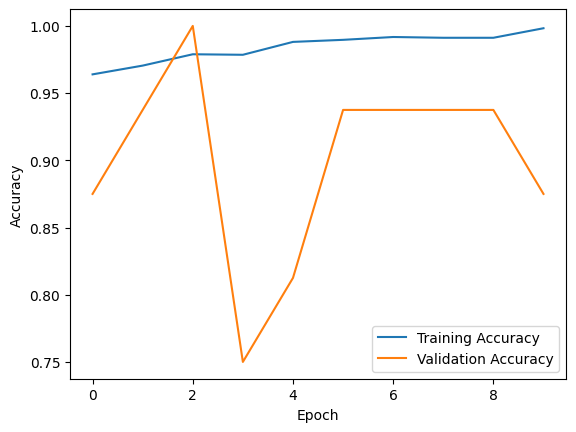

In [36]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

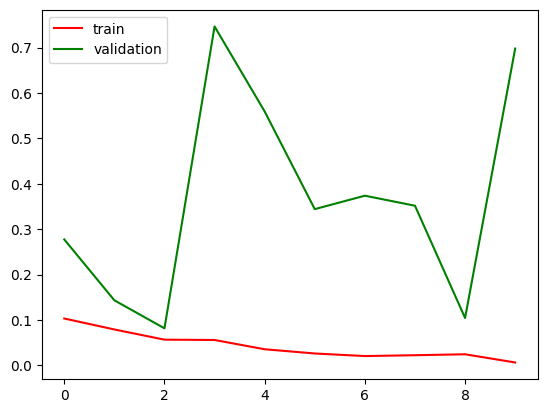

In [37]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()